## Exploratory Data Analysis

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Algerian_cleaned.csv')

In [3]:
df = df.drop(['day','month','year'],axis = 1)

In [4]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [5]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

so as we have some spaces in the values in the classes features, every values is being treated differently (some have spaces,  some have more spaces )

In [6]:
# Encoding of the categories in classes 

df['Classes'] = np.where(df['Classes'].str.contains('not fire'),0,1)

In [7]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [8]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

array([[<Axes: title={'center': 'Temperature'}>,
        <Axes: title={'center': 'RH'}>, <Axes: title={'center': 'Ws'}>],
       [<Axes: title={'center': 'Rain'}>,
        <Axes: title={'center': 'FFMC'}>,
        <Axes: title={'center': 'DMC'}>],
       [<Axes: title={'center': 'DC'}>, <Axes: title={'center': 'ISI'}>,
        <Axes: title={'center': 'BUI'}>],
       [<Axes: title={'center': 'FWI'}>,
        <Axes: title={'center': 'Classes'}>,
        <Axes: title={'center': 'Region'}>]], dtype=object)

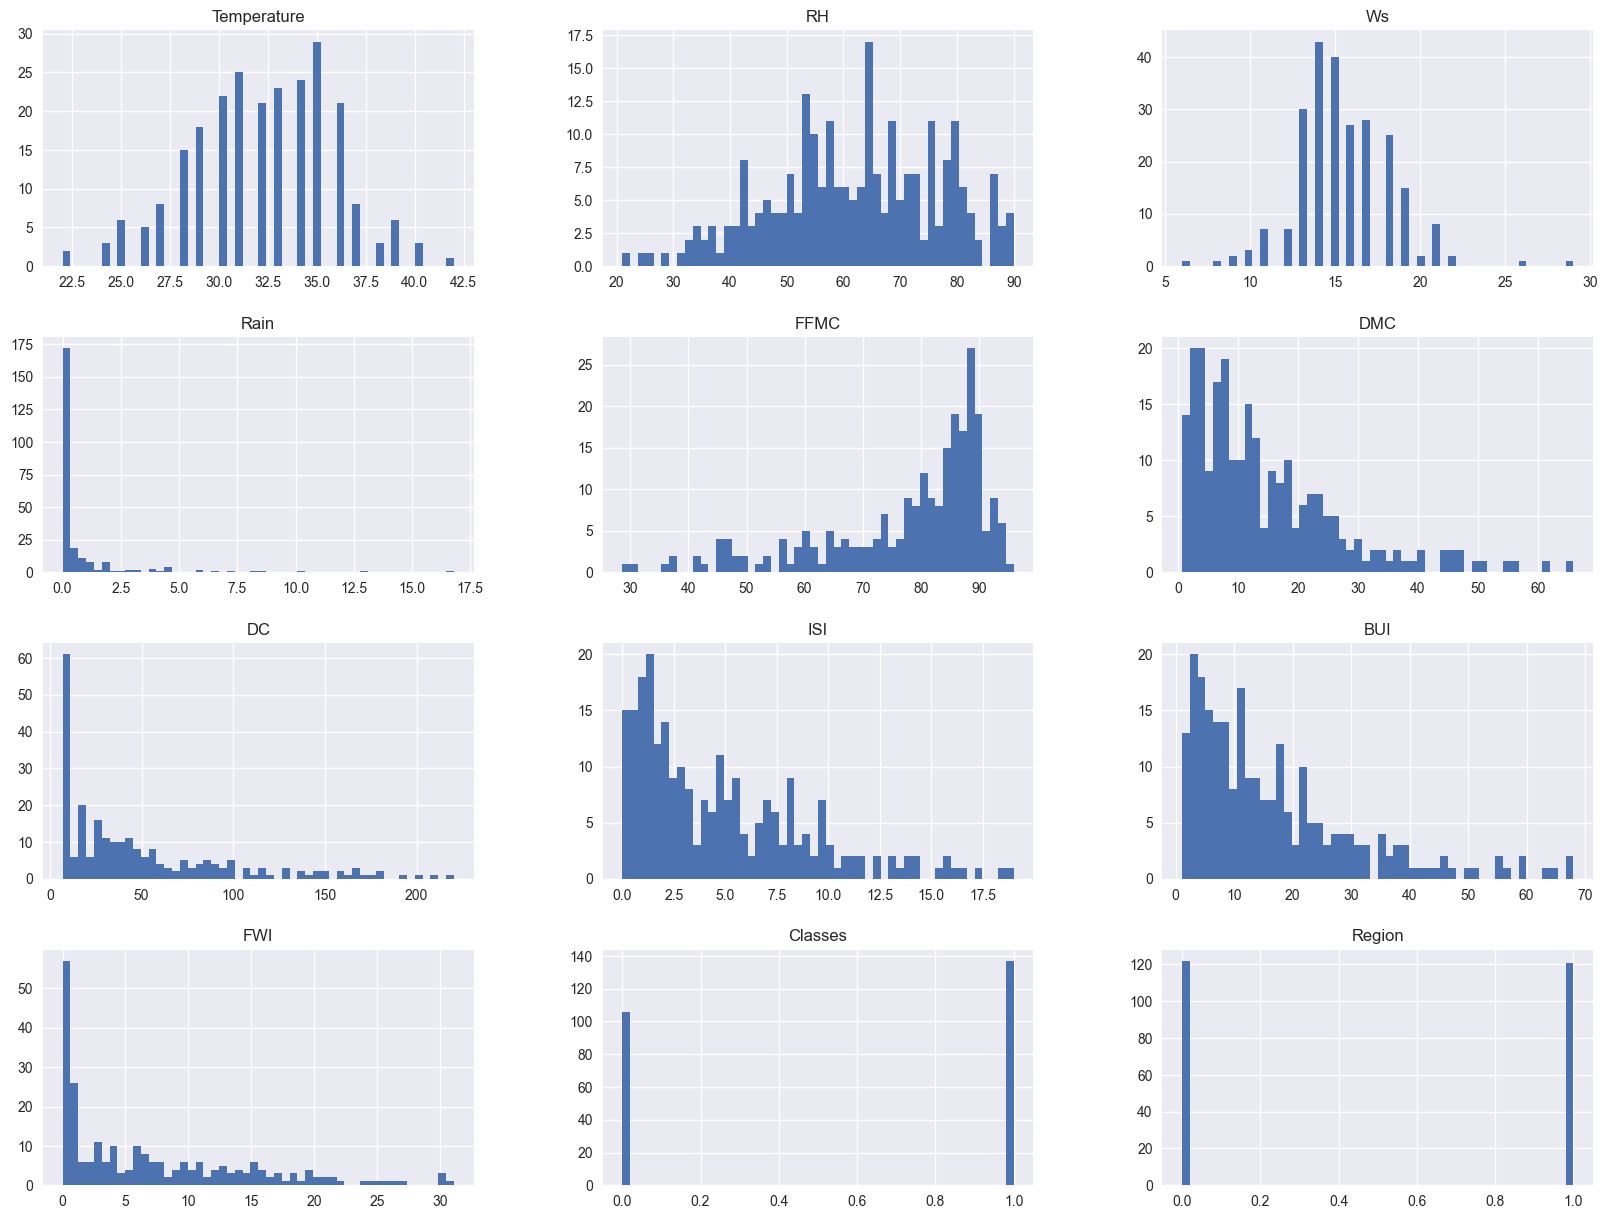

In [9]:
# plot desity plot for all features

plt.style.use('seaborn-v0_8')
df.hist(bins = 50,figsize=(20,15))

In [10]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [11]:
# Percentage of pie charts

percentage = df['Classes'].value_counts()/len(df['Classes'])*100

Text(0.5, 1.0, 'Pie Chart')

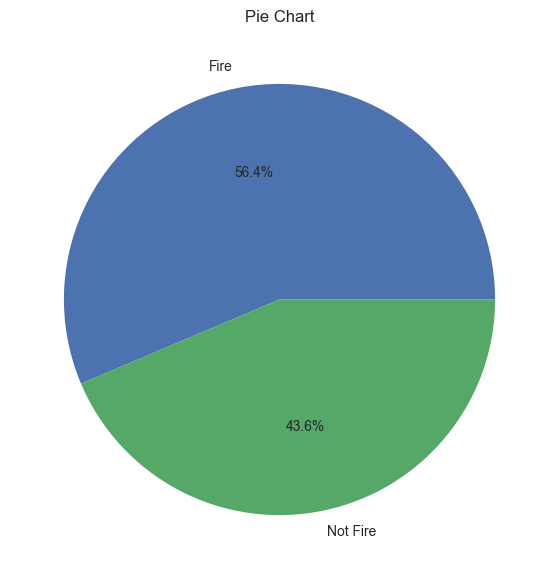

In [12]:
# plotting pie chart

classLabels = ['Fire','Not Fire']
plt.figure(figsize=(12,7))
plt.pie(percentage,labels=classLabels,autopct='%1.1f%%')
plt.title("Pie Chart")

In [13]:
# correlation
df.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


<Axes: >

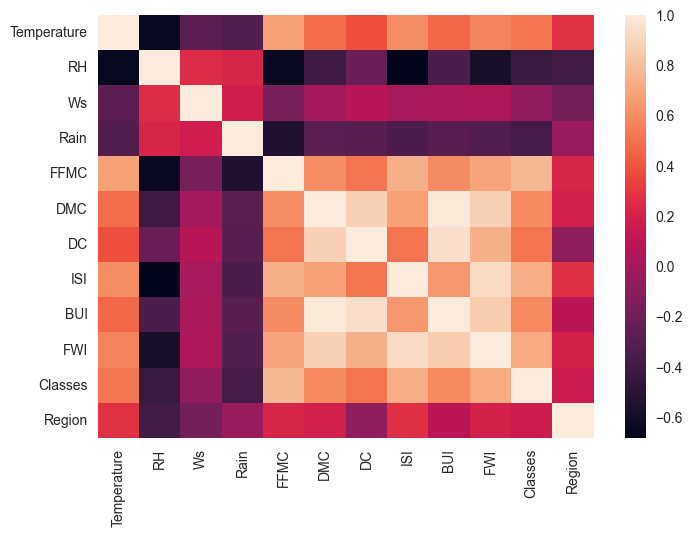

In [14]:
sns.heatmap(df.corr())

<Axes: xlabel='FWI'>

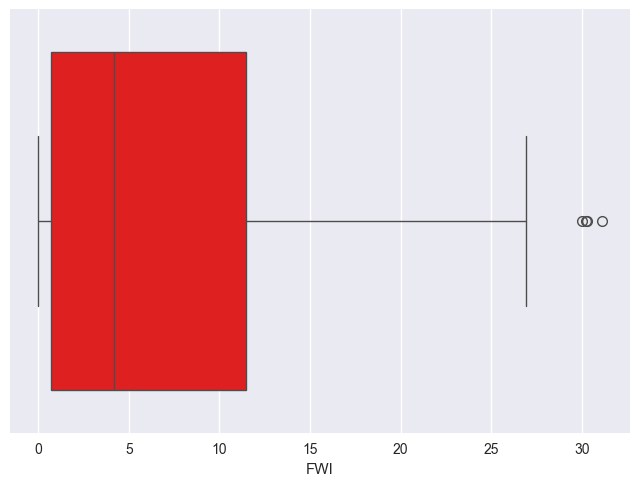

In [15]:
# Box Plots 
sns.boxplot(x = df['FWI'],color= 'red')

In [16]:
#  Monthly fire analysis

df1 = pd.read_csv('Algerian_cleaned.csv')

In [17]:
df1['Classes'] = np.where(df1['Classes'].str.contains('not fire'),'Not Fire','Fire')

In [18]:
df1['Classes'].value_counts()

Classes
Fire        137
Not Fire    106
Name: count, dtype: int64

Text(0, 0.5, 'No of Fire cases')

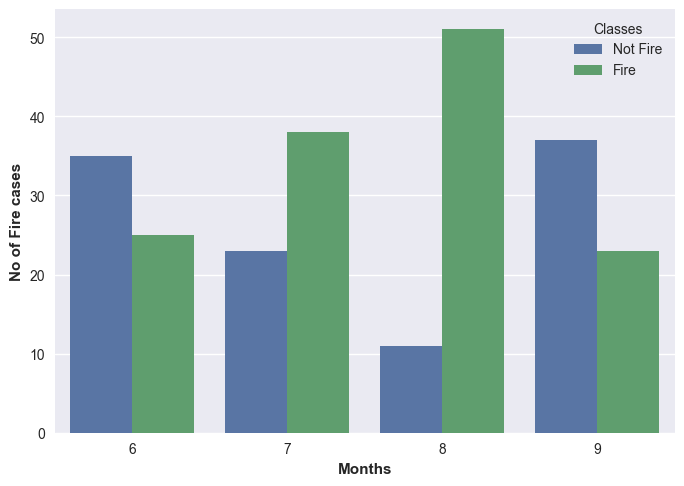

In [19]:
sns.countplot(x='month', hue= 'Classes', data =df1)
plt.xlabel('Months',weight = 'bold')
plt.ylabel('No of Fire cases',weight = 'bold')

AttributeError: 'Text' object has no property 'weigCht'

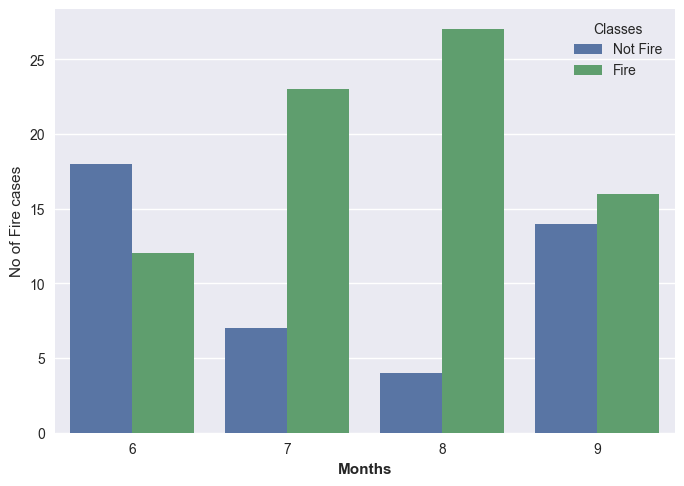

In [20]:
dftemp = df1.loc[df['Region']==1]
sns.countplot(x='month', hue= 'Classes', data =dftemp)
plt.xlabel('Months',weight = 'bold')
plt.ylabel('No of Fire cases',weigCht = 'bold')
plt.title('Fire Analysis of Bejaia Region', weight = 'bold')

Text(0.5, 1.0, 'Fire Analysis of Bejaia Region')

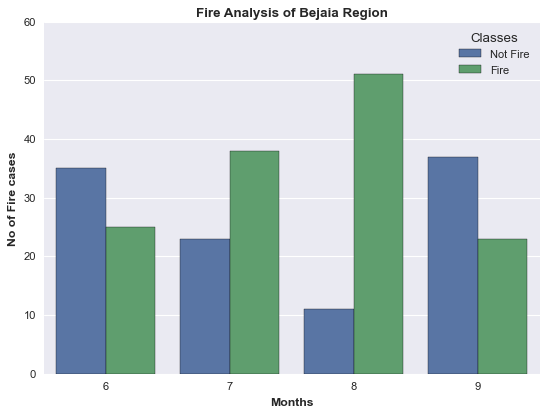

In [ ]:
dftemp1= df1.loc[df['Region']==0]
sns.countplot(x='month', hue= 'Classes', data =dftemp1)
plt.xlabel('Months',weight = 'bold')
plt.ylabel('No of Fire cases',weight = 'bold')
plt.title('Fire Analysis of Bejaia Region', weight = 'bold')